# Individual Assignment AIDM7330

## Exploratory Data Visualization Of The HongKong COVID-19 Data

- **Student ID: 20448589**
- **Student Name: Luo YiFeng**


 The data was from HK Government Open Data: https://data.gov.hk/sc-data/dataset/hk-dh-chpsebcddr-novel-infectious-agent/resource/dae21c96-34b3-40aa-b111-aac24abde893

# Importing and knowing the data

In [639]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [640]:
import pandas as pd 
import numpy as np

In [641]:
#setting
pd.set_option('max_columns',1000)
pd.set_option('max_row',5000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Examining the attributes of the Data Frame (standard procedures)

- ```df.shape``` ("dim" in R) 
- ```df.columns``` (check the variables, like "names" in R) 
- ```df.index``` (check the index of the "rows") 
- ```df.info()```
- ```df.describe()``` (descriptive statistics for numerical variables) 

In [642]:
cases = pd.read_csv('../data/cases.csv')

In [643]:
cases.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,nan,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,nan,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,nan,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,nan,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,nan,Discharged,Non-HK resident,Imported case,Confirmed


In [644]:
cases.tail()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
5697,5698,23/11/2020,Asymptomatic,M,70,nan,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
5698,5699,23/11/2020,Pending,F,65,nan,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
5699,5700,23/11/2020,18/11/2020,F,30,nan,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
5700,5701,23/11/2020,Asymptomatic,F,69,nan,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
5701,5702,23/11/2020,22/11/2020,F,46,nan,To be provided,HK resident,Epidemiologically linked with local case,Confirmed


In [645]:
cases.shape

(5702, 10)

In [646]:
cases.index

RangeIndex(start=0, stop=5702, step=1)

In [647]:
cases.columns

Index(['Case no.', 'Report date', 'Date of onset', 'Gender', 'Age',
       'Name of hospital admitted', 'Hospitalised/Discharged/Deceased',
       'HK/Non-HK resident', 'Case classification*', 'Confirmed/probable'],
      dtype='object')

In [648]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          5702 non-null   int64  
 1   Report date                       5702 non-null   object 
 2   Date of onset                     5702 non-null   object 
 3   Gender                            5702 non-null   object 
 4   Age                               5702 non-null   int64  
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  5702 non-null   object 
 7   HK/Non-HK resident                5702 non-null   object 
 8   Case classification*              5702 non-null   object 
 9   Confirmed/probable                5702 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 445.6+ KB


## Clean the data by columns

In [649]:
cases.drop('Name of hospital admitted', axis = 1, inplace = True)

####  Report date 

In [650]:
# convert Report date from object to date
casesday = cases['Report date']
casesnum = cases['Case no.']
cases['Date to report'] = pd.to_datetime(cases['Report date'], infer_datetime_format=True)
cases['Date to report'].head()

0   2020-01-23
1   2020-01-23
2   2020-01-24
3   2020-01-24
4   2020-01-24
Name: Date to report, dtype: datetime64[ns]

In [651]:
cases1 = cases.copy() # make a copy() 
cases1.drop('Report date', axis = 1, inplace = True)
cases1.head()

,Case no.,Date of onset,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,Date to report
0,1,21/01/2020,M,39,Discharged,Non-HK resident,Imported case,Confirmed,2020-01-23
1,2,18/01/2020,M,56,Discharged,HK resident,Imported case,Confirmed,2020-01-23
2,3,20/01/2020,F,62,Discharged,Non-HK resident,Imported case,Confirmed,2020-01-24
3,4,23/01/2020,F,62,Discharged,Non-HK resident,Imported case,Confirmed,2020-01-24
4,5,23/01/2020,M,63,Discharged,Non-HK resident,Imported case,Confirmed,2020-01-24


#### Hospitalised/Discharged/Deceased

In [652]:
cases2 = cases1.copy() # make a copy
cases2.loc[:,'Hospitalised/Discharged/Deceased'].value_counts()

Discharged        5267
Hospitalised       224
Deceased           108
To be provided      73
No admission        30
Name: Hospitalised/Discharged/Deceased, dtype: int64

In [653]:
# set To be provided, No admission to nan
cases2.loc[cases2['Hospitalised/Discharged/Deceased']=='To be provided', 'Hospitalised/Discharged/Deceased'] = np.nan
cases2.loc[cases2['Hospitalised/Discharged/Deceased']=='No admission', 'Hospitalised/Discharged/Deceased'] = np.nan

# set Hospitalised = 2
cases2.loc[cases2['Hospitalised/Discharged/Deceased']=='Hospitalised', 'Hospitalised/Discharged/Deceased'] = 2
# set Deceased = 1, Discharged = 0
cases2.loc[cases2['Hospitalised/Discharged/Deceased']=='Deceased', 'Hospitalised/Discharged/Deceased'] = 1
cases2.loc[cases2['Hospitalised/Discharged/Deceased']=='Discharged', 'Hospitalised/Discharged/Deceased'] = 0

cases2.head()

,Case no.,Date of onset,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,Date to report
0,1,21/01/2020,M,39,0,Non-HK resident,Imported case,Confirmed,2020-01-23
1,2,18/01/2020,M,56,0,HK resident,Imported case,Confirmed,2020-01-23
2,3,20/01/2020,F,62,0,Non-HK resident,Imported case,Confirmed,2020-01-24
3,4,23/01/2020,F,62,0,Non-HK resident,Imported case,Confirmed,2020-01-24
4,5,23/01/2020,M,63,0,Non-HK resident,Imported case,Confirmed,2020-01-24


#### HK/Non-HK resident

In [654]:
cases2.loc[:,'HK/Non-HK resident'].value_counts()

HK resident        5419
Non-HK resident     231
HK Resident          42
Non-HK Resident       7
non-HK resident       3
Name: HK/Non-HK resident, dtype: int64

In [655]:
# set HK resident = 1
cases2.loc[cases2['HK/Non-HK resident']=='HK resident', 'HK/Non-HK resident'] = 1
cases2.loc[cases2['HK/Non-HK resident']=='HK Resident', 'HK/Non-HK resident'] = 1
# set Non Hk resident = 0
cases2.loc[cases2['HK/Non-HK resident']=='Non-HK resident', 'HK/Non-HK resident'] = 0
cases2.loc[cases2['HK/Non-HK resident']=='Non-HK Resident', 'HK/Non-HK resident'] = 0
cases2.loc[cases2['HK/Non-HK resident']=='non-HK resident', 'HK/Non-HK resident'] = 0

cases2['HK/Non-HK resident'].head()

0    0
1    1
2    0
3    0
4    0
Name: HK/Non-HK resident, dtype: object

#### Case classification*

In [656]:
cases2.loc[:,'Case classification*'].value_counts()

Epidemiologically linked with local case             2470
Imported case                                        1586
Local case                                           1441
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Epidemiologically linked with imported case            40
Name: Case classification*, dtype: int64

#### Confirmed/probable

In [657]:
cases2.loc[:,'Confirmed/probable'].value_counts()

Confirmed    5701
Probable        1
Name: Confirmed/probable, dtype: int64

In [658]:
cases2.loc[cases2['Confirmed/probable']=='Confirmed', 'Confirmed/probable'] = 1
cases2.loc[cases2['Confirmed/probable']=='Probable', 'Confirmed/probable'] = 0

cases2.head()

,Case no.,Date of onset,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,Date to report
0,1,21/01/2020,M,39,0,0,Imported case,1,2020-01-23
1,2,18/01/2020,M,56,0,1,Imported case,1,2020-01-23
2,3,20/01/2020,F,62,0,0,Imported case,1,2020-01-24
3,4,23/01/2020,F,62,0,0,Imported case,1,2020-01-24
4,5,23/01/2020,M,63,0,0,Imported case,1,2020-01-24


#### Gender

In [659]:
cases2.loc[:,'Gender'].value_counts()

F    2864
M    2838
Name: Gender, dtype: int64

In [660]:
cases2.loc[cases2['Gender']=='M', 'Gender'] = 1
cases2.loc[cases2['Gender']=='F', 'Gender'] = 0

cases2.head()

,Case no.,Date of onset,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,Date to report
0,1,21/01/2020,1,39,0,0,Imported case,1,2020-01-23
1,2,18/01/2020,1,56,0,1,Imported case,1,2020-01-23
2,3,20/01/2020,0,62,0,0,Imported case,1,2020-01-24
3,4,23/01/2020,0,62,0,0,Imported case,1,2020-01-24
4,5,23/01/2020,1,63,0,0,Imported case,1,2020-01-24


#### Date of onset

In [661]:
cases2.loc[:,'Date of onset'].value_counts()

Asymptomatic    1599
27/07/2020       130
25/07/2020       118
24/07/2020       110
22/07/2020       104
21/07/2020       103
20/07/2020       101
23/07/2020        99
17/07/2020        96
26/07/2020        95
28/07/2020        93
16/07/2020        89
18/07/2020        88
15/07/2020        83
29/07/2020        80
14/07/2020        76
19/07/2020        71
01/08/2020        60
30/07/2020        59
31/07/2020        58
13/07/2020        57
03/08/2020        54
12/07/2020        52
05/08/2020        50
02/08/2020        50
04/08/2020        47
Pending           47
10/07/2020        45
19/03/2020        44
11/07/2020        43
24/03/2020        41
23/03/2020        41
16/03/2020        40
07/08/2020        40
07/07/2020        39
17/03/2020        39
18/03/2020        38
20/03/2020        38
09/07/2020        38
25/03/2020        37
27/03/2020        37
10/08/2020        36
08/08/2020        34
09/08/2020        32
26/03/2020        32
06/08/2020        32
22/03/2020        31
21/03/2020   

- **Asymptomatic 1599**
- **Pending 47**
- **Unknown 26**
- **January 1**
- **October 1**
- **Mid-July 1**
- **Mid-March 1**

##### Make the Main df for Analysis 

In [662]:
casesForMain = cases2.copy()

In [663]:
# set Asymptonmatic, Pending, Unknown to NaN
casesForMain.loc[casesForMain['Date of onset']=='Asymptomatic', 'Date of onset'] = np.nan
casesForMain.loc[casesForMain['Date of onset']=='Pending', 'Date of onset'] = np.nan
casesForMain.loc[casesForMain['Date of onset']=='Unknown', 'Date of onset'] = np.nan

casesForMain.loc[casesForMain['Date of onset']=='January', 'Date of onset'] = '01/01/2020'
casesForMain.loc[casesForMain['Date of onset']=='October', 'Date of onset'] = '01/10/2020'
casesForMain.loc[casesForMain['Date of onset']=='Mid-July', 'Date of onset'] = '15/07/2020'
casesForMain.loc[casesForMain['Date of onset']=='Mid-March', 'Date of onset'] = '15/03/2020'

In [664]:
# convert the data type
casesForMain['Onset Date'] = pd.to_datetime(casesForMain['Date of onset'], infer_datetime_format=True)
casesForMain.drop(['Date of onset'], axis=1, inplace=True)
casesForMain.head()

,Case no.,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,Date to report,Onset Date
0,1,1,39,0,0,Imported case,1,2020-01-23,2020-01-21
1,2,1,56,0,1,Imported case,1,2020-01-23,2020-01-18
2,3,0,62,0,0,Imported case,1,2020-01-24,2020-01-20
3,4,0,62,0,0,Imported case,1,2020-01-24,2020-01-23
4,5,1,63,0,0,Imported case,1,2020-01-24,2020-01-23


##### Make the df for Asymptomatic

In [665]:
casesForAsy = cases2.copy()

In [666]:
casesForAsy.drop(['Date of onset'], axis = 1, inplace = True)
casesForAsy.head()

,Case no.,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,Date to report
0,1,1,39,0,0,Imported case,1,2020-01-23
1,2,1,56,0,1,Imported case,1,2020-01-23
2,3,0,62,0,0,Imported case,1,2020-01-24
3,4,0,62,0,0,Imported case,1,2020-01-24
4,5,1,63,0,0,Imported case,1,2020-01-24


## Q1 How the Covid-19 cases are rising in Hong Kong?

In [667]:
df = casesForMain.copy()

In [668]:
df_q1 = df[['Date to report', 'Case no.', 'Confirmed/probable']]
df_q1.set_index('Case no.', inplace=True)
df_q1.head()

,Date to report,Confirmed/probable
Case no.,,
1,2020-01-23,1
2,2020-01-23,1
3,2020-01-24,1
4,2020-01-24,1
5,2020-01-24,1


In [669]:
df_q1.tail()

,Date to report,Confirmed/probable
Case no.,,
5698,2020-11-23,1
5699,2020-11-23,1
5700,2020-11-23,1
5701,2020-11-23,1
5702,2020-11-23,1


In [670]:
# Daily cases in HongKong
daily_cases = df_q1.groupby('Date to report').sum()
daily_cases.rename(columns={'Confirmed/probable':'Daily Cases'}, inplace=True)
daily_cases.reset_index(inplace=True)
daily_cases.head()

,Date to report,Daily Cases
0,2020-01-23,2
1,2020-01-24,3
2,2020-01-26,3
3,2020-01-29,2
4,2020-01-30,2


In [671]:
date = daily_cases.copy()
date.drop(['Daily Cases'], axis=1, inplace=True)
#date

In [672]:
# Total cases in HongKong
total_cases = daily_cases.copy()
total_cases.drop(['Date to report'], axis=1, inplace=True)
total_cases.rename(columns={'Daily Cases':'Total Cases'}, inplace=True)
#total_cases.tail()

In [673]:
for index, row in total_cases.iterrows():
    if index == 0:
        row['Total Cases'] = row['Total Cases']
    else:
        row['Total Cases'] += total_cases.at[index - 1, 'Total Cases']
#total_cases.tail()

In [674]:
total_cases['Date to report'] = date['Date to report']
total_cases.head()

,Total Cases,Date to report
0,2,2020-01-23
1,5,2020-01-24
2,8,2020-01-26
3,10,2020-01-29
4,12,2020-01-30


In [675]:
# Install library using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly

In [676]:
import plotly.graph_objs as go

In [677]:
# plot the Rise in COVID-19 cases in HongKONG
fig = go.Figure()
fig.add_trace(go.Scatter(x = total_cases['Date to report'], y = total_cases['Total Cases'],
                         mode='lines', name='Total Cases'))

fig.add_trace(go.Scatter(x = daily_cases['Date to report'], y = daily_cases['Daily Cases'],
                        mode='lines', name='New Cases'))

fig.update_layout(title_text='Trend of Coronavirus Cases in HongKong(China)', plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [678]:
## New COVID-19 cases in HongKong Everyday
import plotly.express as px
fig = px.bar(daily_cases, x='Date to report', y='Daily Cases', barmode='group', height=400)
fig.update_layout(title_text='New Coronavirus Cases in HongKong(China) per day', plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [679]:
# Total cases in HongKong Everyday
fig = px.bar(total_cases, x='Date to report', y='Total Cases', barmode='group', height=500)
fig.update_layout(title_text='Total Coronavirus Cases in HongKong(China) per day', plot_bgcolor='rgb(250, 242, 242)')
fig.show()

### Q2: What is the amout of Hospitalised/Discharged/Deceased?

In [680]:
data = casesForMain[['Hospitalised/Discharged/Deceased', 'Confirmed/probable']].copy()
data.head()

,Hospitalised/Discharged/Deceased,Confirmed/probable
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [681]:
data.dropna(inplace=True)

In [682]:
data1 = data.copy()

In [683]:
data1.loc[data1['Hospitalised/Discharged/Deceased']==1, 'Hospitalised/Discharged/Deceased'] = 'Deceased'
data1.loc[data1['Hospitalised/Discharged/Deceased']==2, 'Hospitalised/Discharged/Deceased'] = 'Hospitalised'
data1.loc[data1['Hospitalised/Discharged/Deceased']==0, 'Hospitalised/Discharged/Deceased'] = 'Discharged'
data1.head()

,Hospitalised/Discharged/Deceased,Confirmed/probable
0,Discharged,1
1,Discharged,1
2,Discharged,1
3,Discharged,1
4,Discharged,1


In [684]:
df = data1.groupby('Hospitalised/Discharged/Deceased').sum()
df.reset_index(inplace=True)
df

,Hospitalised/Discharged/Deceased,Confirmed/probable
0,Deceased,108
1,Discharged,5266
2,Hospitalised,224


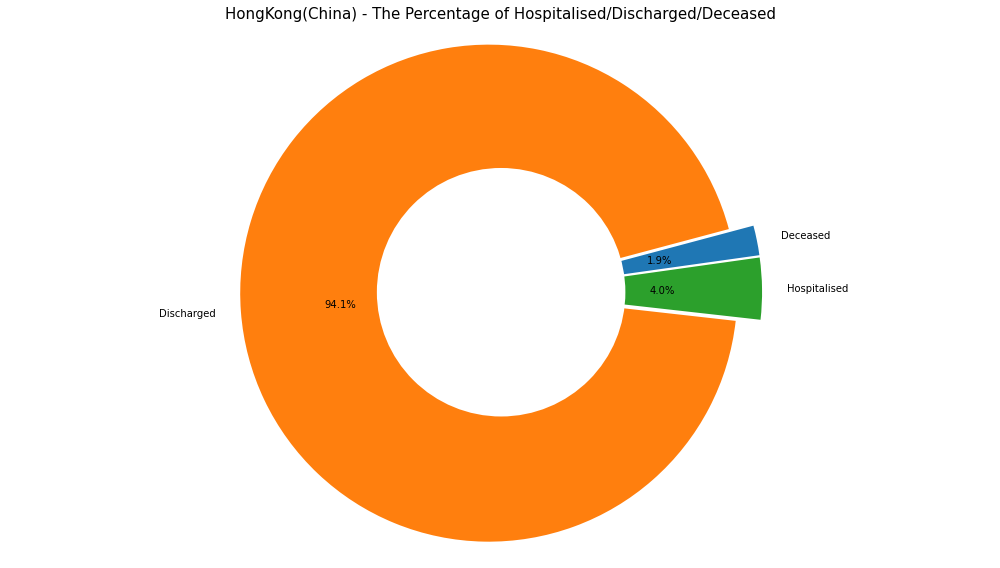

In [685]:
labels = list(df['Hospitalised/Discharged/Deceased'])
sizes = list(df['Confirmed/probable'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize=(14, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=8, explode=explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('HongKong(China) - The Percentage of Hospitalised/Discharged/Deceased', fontsize=15)
plt.axis('equal')
plt.tight_layout()

In [686]:
df.rename(columns={'Confirmed/probable':'Total Cases'}, inplace=True)

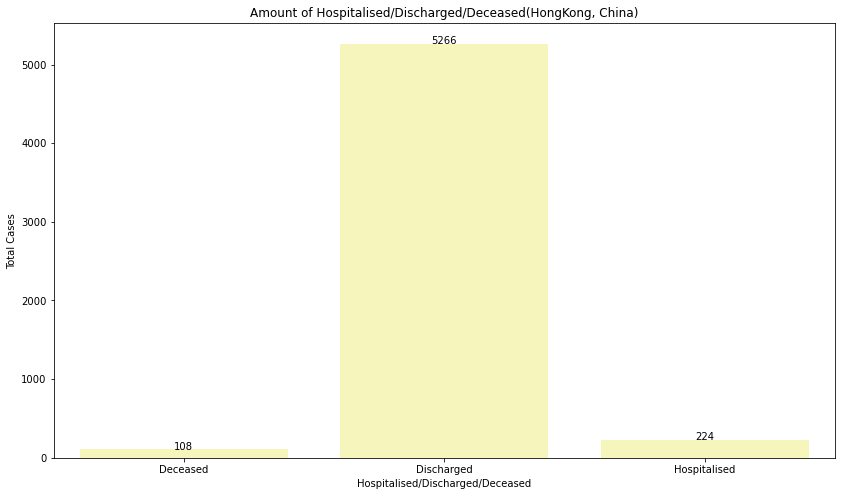

In [687]:
plt.figure(figsize=(14,8))
sns.barplot(data=df, x='Hospitalised/Discharged/Deceased', y='Total Cases', color=sns.color_palette('Set3')[1])
plt.title('Amount of Hospitalised/Discharged/Deceased(HongKong, China)')
for i in range(df.shape[0]):
    count = df.iloc[i]['Total Cases']
    plt.text(i, count+1, count, ha='center')

### Q3: What is the Percentage of Gender ?

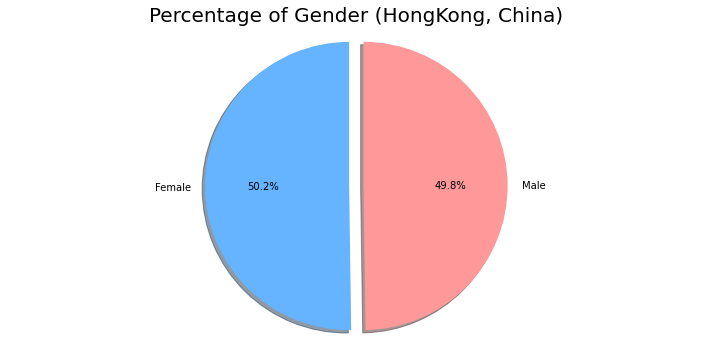

In [690]:
labels = ['Female', 'Male']
sizes = []
sizes.append(list(casesForMain['Gender'].value_counts())[0])
sizes.append(list(casesForMain['Gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize = (10, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Percentage of Gender (HongKong, China)', fontsize=20)
plt.axis('equal')
plt.tight_layout()

In [691]:
data = casesForMain[['Gender', 'Confirmed/probable']].copy()
data.loc[data['Gender']==1, 'Gender'] = 'Male'
data.loc[data['Gender']==0, 'Gender'] = 'Female'
data1 = data.groupby('Gender').sum()
data1.reset_index(inplace=True)
data1.rename(columns={'Confirmed/probable':'Total Cases'}, inplace=True)
data1

,Gender,Total Cases
0,Female,2864
1,Male,2837


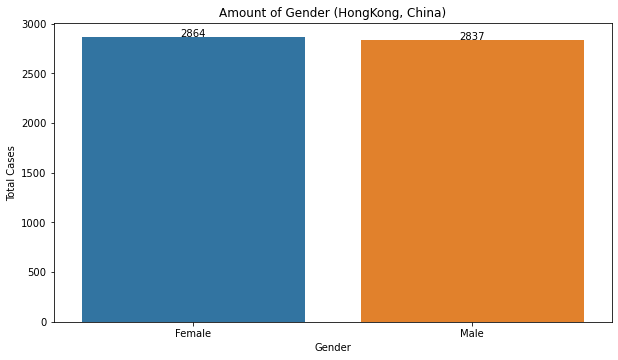

In [692]:
plt.figure(figsize=(10,5.5))
sns.barplot(data=data1, x='Gender', y='Total Cases')
plt.title('Amount of Gender (HongKong, China)')
for i in range(data1.shape[0]):
    count = data1.iloc[i]['Total Cases']
    plt.text(i, count+1, count, ha='center')

### Q4: What is the Percentage of HK/ Non-HK Resident ?

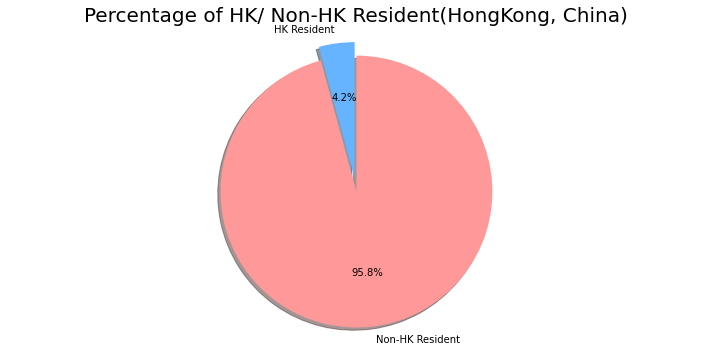

In [693]:
labels = ['HK Resident', 'Non-HK Resident']
sizes = []
sizes.append(list(casesForMain['HK/Non-HK resident'].value_counts())[1])
sizes.append(list(casesForMain['HK/Non-HK resident'].value_counts())[0])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize = (10, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Percentage of HK/ Non-HK Resident(HongKong, China)', fontsize=20)
plt.axis('equal')
plt.tight_layout()

In [694]:
data = casesForMain[['HK/Non-HK resident', 'Confirmed/probable']].copy()
data.loc[data['HK/Non-HK resident']==1, 'HK/Non-HK resident'] = 'HK Resident'
data.loc[data['HK/Non-HK resident']==0, 'HK/Non-HK resident'] = 'Non-HK Resident'
data1 = data.groupby('HK/Non-HK resident').sum()
data1.reset_index(inplace=True)
data1.rename(columns={'Confirmed/probable':'Total Cases'}, inplace=True)
data1

,HK/Non-HK resident,Total Cases
0,HK Resident,5460
1,Non-HK Resident,241


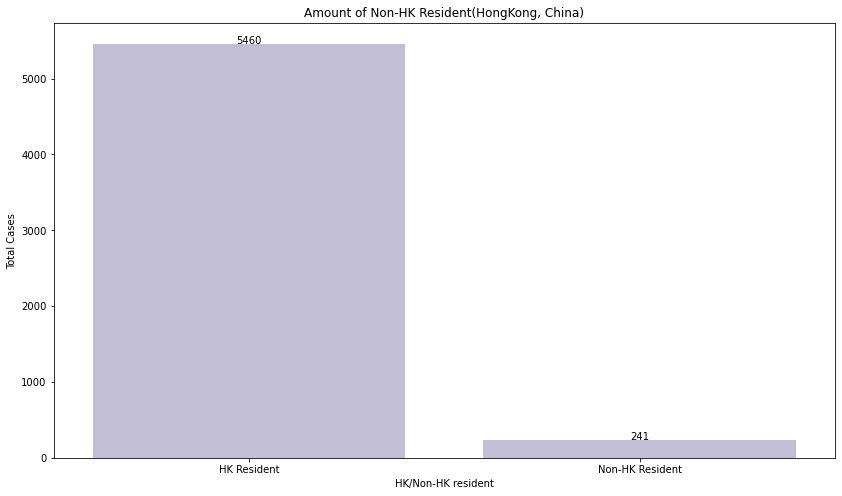

In [695]:
plt.figure(figsize=(14,8))
sns.barplot(data=data1, x='HK/Non-HK resident', y='Total Cases', color=sns.color_palette('Set3')[2])
plt.title('Amount of Non-HK Resident(HongKong, China)')
for i in range(data1.shape[0]):
    count = data1.iloc[i]['Total Cases']
    plt.text(i, count+1, count, ha='center')

### Q5: What is the Percentage of Case classification ?

In [696]:
cases2.loc[:,'Case classification*'].value_counts()

Epidemiologically linked with local case             2470
Imported case                                        1586
Local case                                           1441
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Epidemiologically linked with imported case            40
Name: Case classification*, dtype: int64

In [697]:
data = casesForMain[['Case classification*', 'Confirmed/probable']].copy()
data1 = data.groupby('Case classification*').sum()
data1.rename(columns={'Confirmed/probable':'Total Cases'}, inplace=True)
data1.reset_index(inplace=True)
data1.head()

,Case classification*,Total Cases
0,Epidemiologically linked with imported case,40
1,Epidemiologically linked with local case,2470
2,Epidemiologically linked with possibly local case,62
3,Imported case,1585
4,Local case,1441


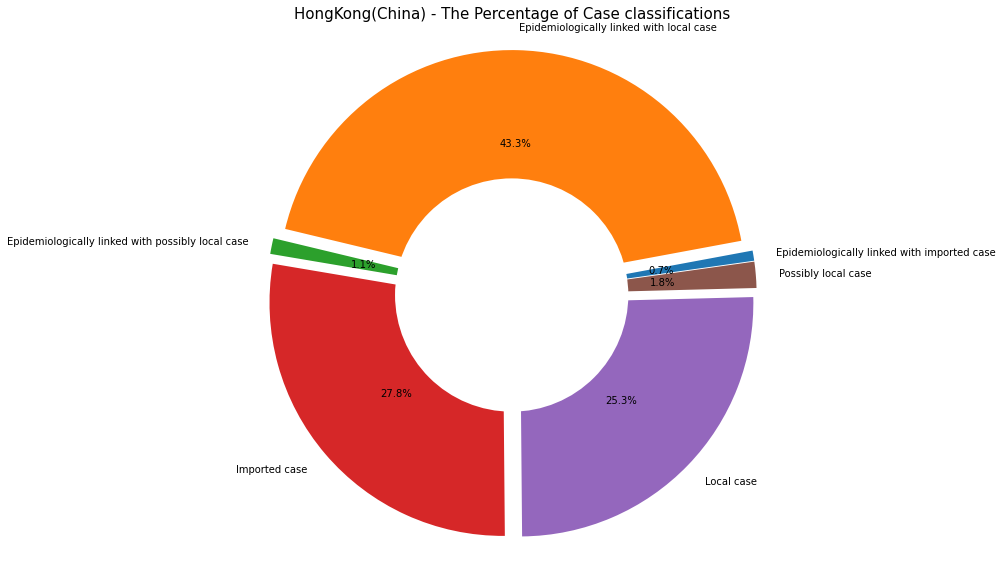

In [698]:
labels = list(data1['Case classification*'])
sizes = list(data1['Total Cases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize=(14, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=8, explode=explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('HongKong(China) - The Percentage of Case classifications', fontsize=15)
plt.axis('equal')
plt.tight_layout()


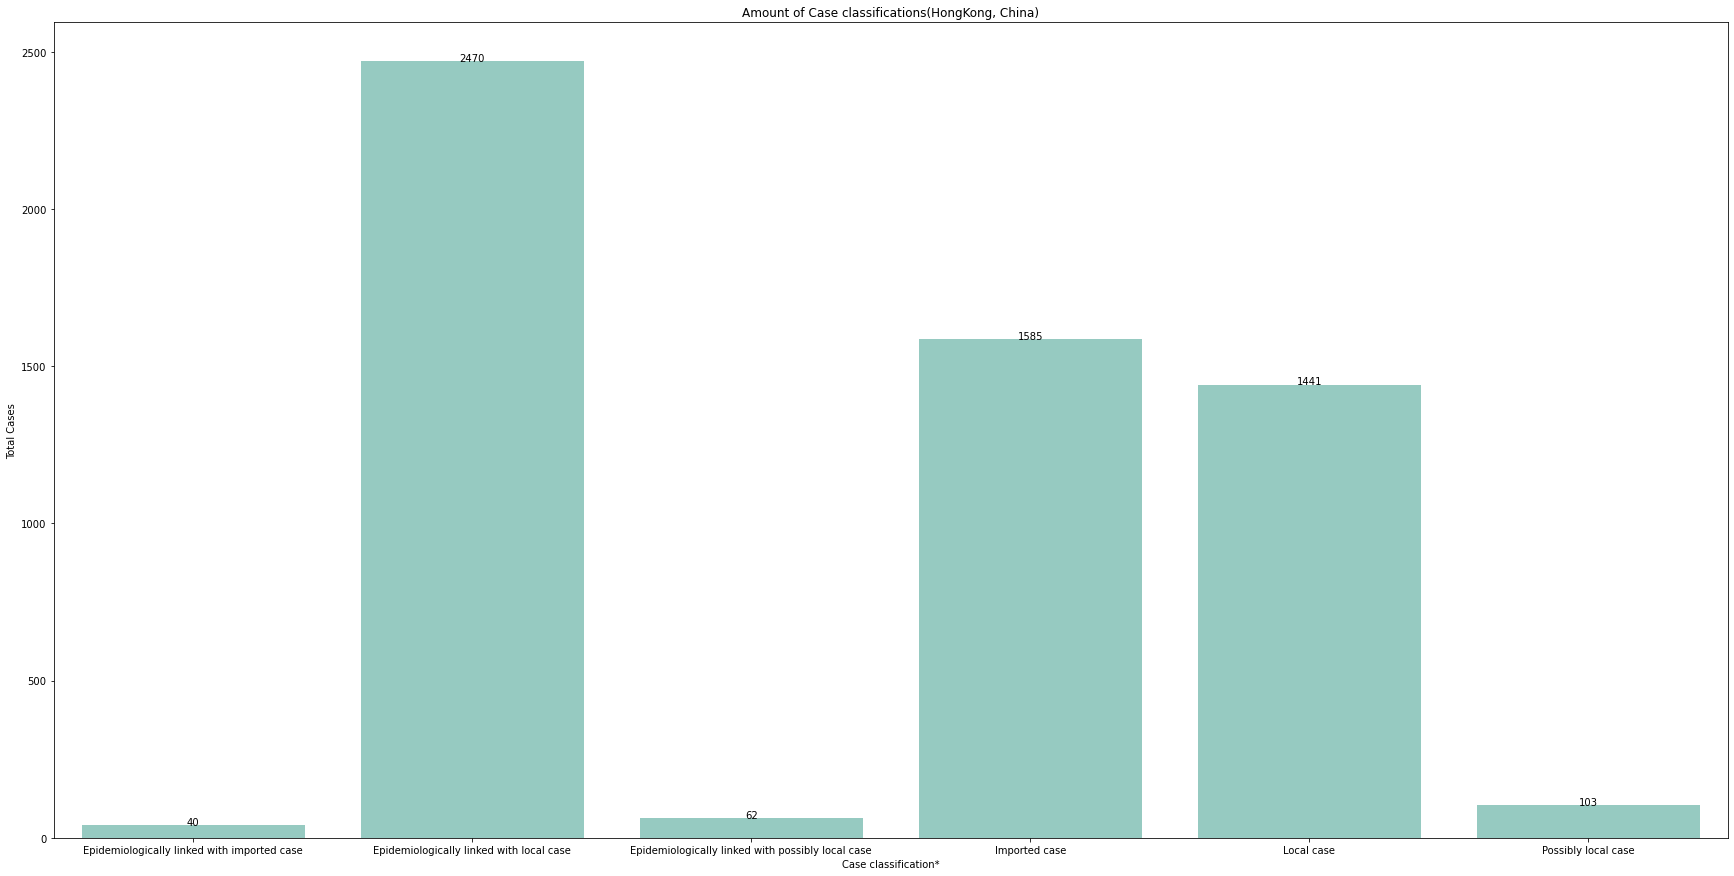

In [699]:
plt.figure(figsize=(30,15))
sns.barplot(data=data1, x='Case classification*', y='Total Cases', color=sns.color_palette('Set3')[0])
plt.title('Amount of Case classifications(HongKong, China)')
for i in range(data1.shape[0]):
    count = data1.iloc[i]['Total Cases']
    plt.text(i, count+1, count, ha='center')

### Q6: Age group

In [715]:
data = casesForMain.copy()

In [716]:
data = data[['Age','Confirmed/probable']]
data.head()

,Age,Confirmed/probable
0,39,1
1,56,1
2,62,1
3,62,1
4,63,1


In [717]:
# Have a age group column
# into 9 clusters
# '0-9'
# '10-19'
# '20-29'
# '30-39'
# '40-49'
# '50-59'
# '60-69'
# '70-79'
# '>=80'

bins = [0,10,20,30,40,50,60,70,80,120]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','>=80']

data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data.head()

,Age,Confirmed/probable,Age Group
0,39,1,30-39
1,56,1,50-59
2,62,1,60-69
3,62,1,60-69
4,63,1,60-69


In [718]:
data1 = data[['Age Group', 'Confirmed/probable']].copy()
data1.rename(columns={'Confirmed/probable':'Total Cases'}, inplace=True)
data2 = data1.groupby('Age Group').sum()
data2.reset_index(inplace=True)

In [719]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(data2.columns),
                fill_color='lightpink',
                align='left'),
    cells=dict(values=[data2['Age Group'], data2['Total Cases']],
               fill_color='lightblue',
               align='left'))
])

fig.show()

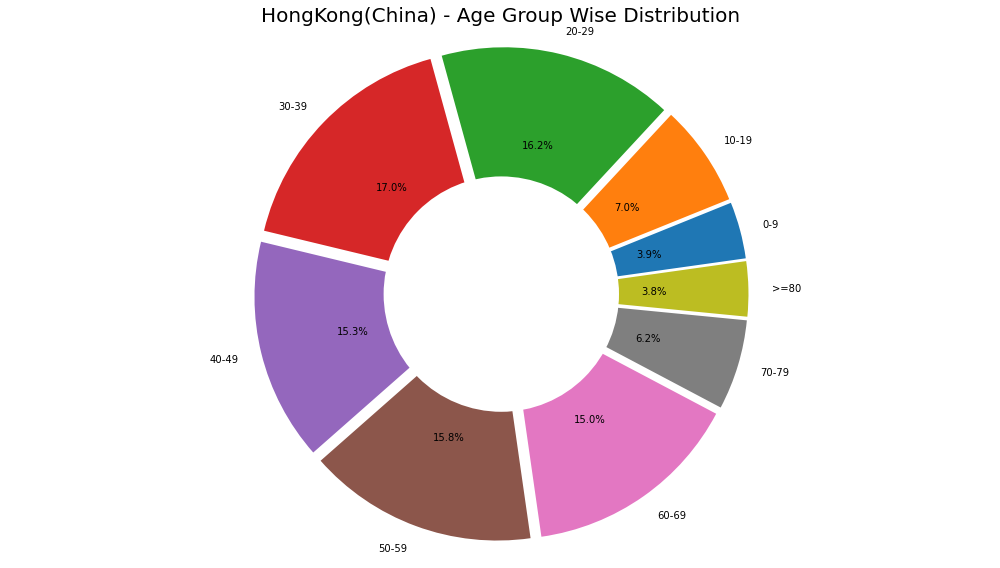

In [720]:
labels = list(data2['Age Group'])
sizes = list(data2['Total Cases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize=(14,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=8, explode=explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('HongKong(China) - Age Group Wise Distribution', fontsize=20)
plt.axis('equal')
plt.tight_layout()

In [723]:
figure = px.bar(data2, x=data2['Age Group'], y=data2['Total Cases'], color='Age Group')
figure.update_layout(plot_bgcolor='rgb(275, 275, 275)',
                    showlegend=False)

figure.data[1].marker.line.width = 3
figure.data[1].marker.line.color = 'black'

figure.show()

In [724]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data2['Age Group'],y=data2['Total Cases'], 
                         line_shape='spline',fill='tonexty')) 

fig.update_layout(title="Age wise Confirmed Cases in HongKong(China)",yaxis_title="Total Number of cases",xaxis_title="Age Group")

fig.update_layout(plot_bgcolor='rgb(275, 275, 275)',height=600)

fig.show()

### Q7:Age and Gender 

In [576]:
data = casesForMain.copy()

In [577]:
data = data[['Age','Confirmed/probable','Gender']]
bins = [0,10,20,30,40,50,60,70,80,120]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','>=80']

data['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

data.head()

,Age,Confirmed/probable,Gender,Age Group
0,39,1,1,30-39
1,56,1,1,50-59
2,62,1,0,60-69
3,62,1,0,60-69
4,63,1,1,60-69


In [578]:
data.loc[data['Gender']==1, 'Gender'] = 'Male'
data.loc[data['Gender']==0, 'Gender'] = 'Female'
data.rename(columns={'Confirmed/probable':'Total Cases'}, inplace=True)
data.head()

,Age,Total Cases,Gender,Age Group
0,39,1,Male,30-39
1,56,1,Male,50-59
2,62,1,Female,60-69
3,62,1,Female,60-69
4,63,1,Male,60-69


In [579]:
df_pivot = pd.pivot_table(data, index='Gender', columns='Age Group', 
                          values=['Total Cases'], aggfunc={'Total Cases':np.sum})
df_pivot

Total Cases                                               
Age Group         0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79 >=80
Gender                                                              
Female             99   184   423   520   472   477   412   158  119
Male              123   214   499   447   398   422   443   195   96

Text(0.5, 1.0, 'HongKong(China) - Age and Gender ')

<Figure size 1440x72 with 0 Axes>

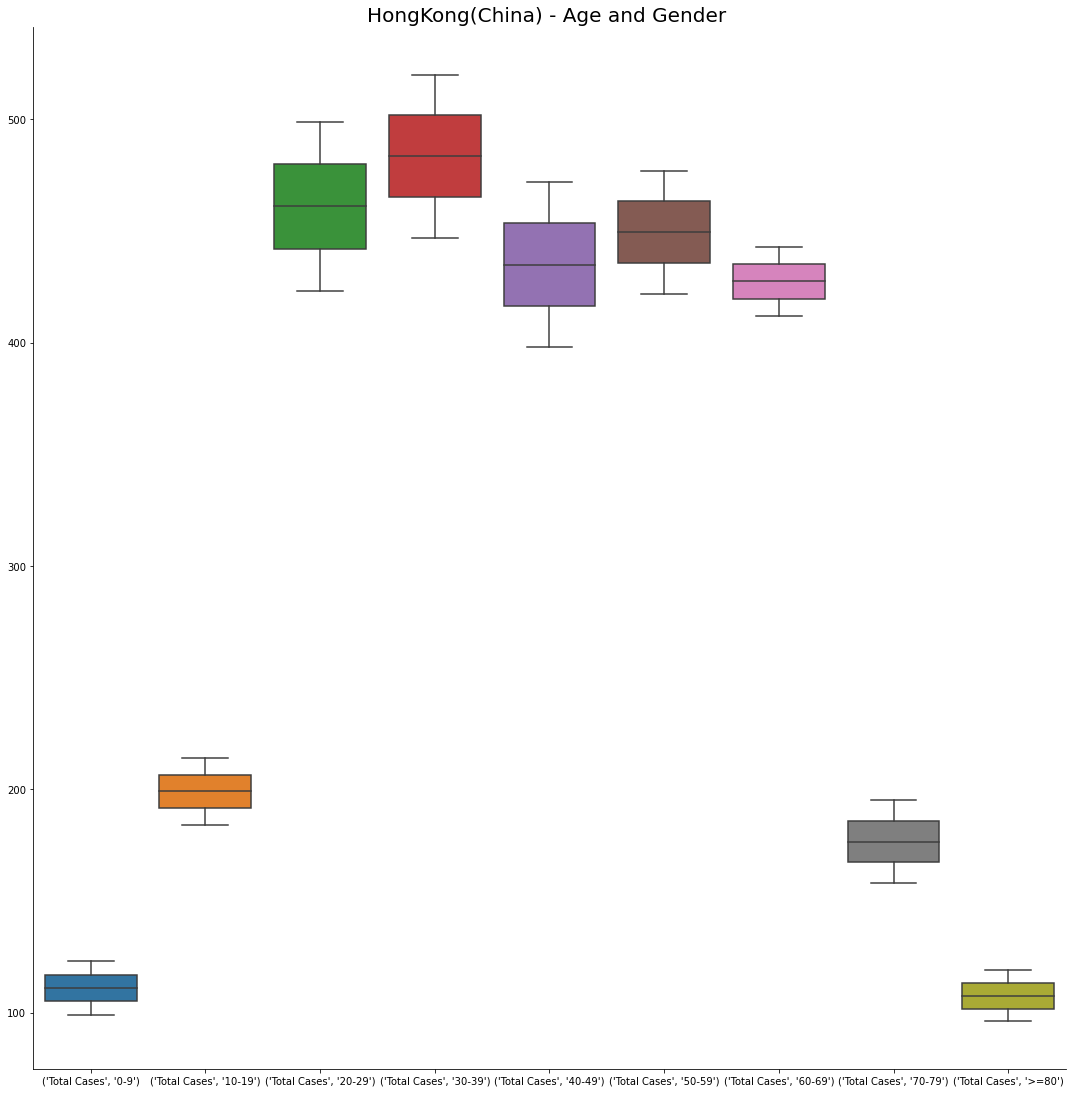

In [601]:
plt.figure(figsize=(20,1))
sns.catplot(data=df_pivot, kind = 'box', height=15)
plt.title('HongKong(China) - Age and Gender ', fontsize=20)